<h1> Image Classifier </h1>

#### Introduction

The Image Classifier project aims to develop an image classification model using deep learning techniques, specifically leveraging convolutional neural networks (CNNs). The goal is to accurately classify images into one of seven categories: bikes, cars, cats, dogs, flowers, horses, and humans. This project showcases the application of machine learning in categorizing diverse visual data.

#### Dataset

The dataset used for training and testing the DeepImage Classifier consists of images organized into seven classes, each representing a specific category:

-   **Bikes**: Images of bicycles and motorcycles.
-   **Cars**: Images of various car models.
-   **Cats**: Images of domestic cats.
-   **Dogs**: Images of different dog breeds.
-   **Flowers**: Images depicting different types of flowers.
-   **Horses**: Images showcasing horses in various environments.
-   **Humans**: Images featuring individuals or groups of people.

The images are sourced from respective folders within a directory named "data". This structured dataset allows the model to learn and differentiate between different visual features associated with each category.

#### Model Architecture

The image classification model is built using TensorFlow and Keras, utilizing a CNN architecture. The model architecture includes convolutional layers for feature extraction, max-pooling layers for spatial downsampling, and fully connected layers for classification. Dropout regularization is employed to mitigate overfitting during training.

#### Training and Evaluation

The dataset is split into training and validation sets using an ImageDataGenerator with data augmentation techniques such as rotation, shifting, flipping, and zooming to enhance model generalization. The model is trained using the Adam optimizer with a categorical cross-entropy loss function.

Early stopping is implemented to prevent overfitting, monitoring the validation loss. The training progress and performance metrics, such as accuracy and loss, are visualized using matplotlib to analyze model learning dynamics and ensure effective training.

#### Prediction

Once trained, the model can make predictions on new images. For inference, the model takes an image as input, preprocesses it to match the input size and format expected by the model, and then predicts the class label using a softmax activation function. This prediction process allows the model to classify unseen images into one of the seven predefined categories.

<u>Here's a step-by-step guide </u>

### Step 1: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Set Directory and Prepare Data

Define the base directory where your image data is located (`'data'` in this case) and set up an `ImageDataGenerator` for both training and validation data with augmentation.

In [3]:
base_dir = 'data'

# Image Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1444 images belonging to 7 classes.
Found 359 images belonging to 7 classes.


### Step 3: Build the Model

Define your convolutional neural network model using `Sequential` and add layers including convolutional (`Conv2D`), pooling (`MaxPooling2D`), flatten (`Flatten`), and fully connected (`Dense`) layers. Also, include dropout for regularization.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 classes
])

# Compile the Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\srini\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,815,047 (26.00 MB)

 Trainable params: 6,815,047 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model

Train the model using the `fit` method, specifying parameters such as epochs, batch size, and callbacks for early stopping.

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/30


C:\Users\srini\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2504 - loss: 1.9101 - val_accuracy: 0.2869 - val_loss: 1.8400
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1875 - loss: 1.9114 - val_accuracy: 0.1429 - val_loss: 1.8748
Epoch 3/30


C:\Users\srini\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 619ms/step - accuracy: 0.3428 - loss: 1.7750 - val_accuracy: 0.3324 - val_loss: 1.6820
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3125 - loss: 1.8104 - val_accuracy: 0.4286 - val_loss: 1.4224
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 652ms/step - accuracy: 0.4158 - loss: 1.5514 - val_accuracy: 0.4006 - val_loss: 1.6565
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 1.6679 - val_accuracy: 0.5714 - val_loss: 1.5186
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 604ms/step - accuracy: 0.4948 - loss: 1.3702 - val_accuracy: 0.4403 - val_loss: 1.5954
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.3055 - val_accuracy: 0.2857 - val_loss: 1.5080
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 613ms/step - accuracy: 0.5383 - loss: 1.2346 - val_accuracy: 0.5000 - val_loss: 1.4405


### Step 5: Evaluate the Model

Evaluate the model's performance on the validation data.

In [6]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.3601 - loss: 1.6628
Validation Accuracy: 36.21%


### Step 6: Visualize Training History

Plot graphs to visualize training and validation accuracy and loss over epochs.

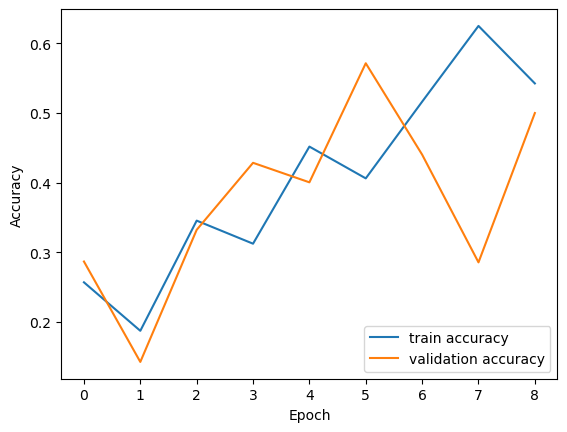

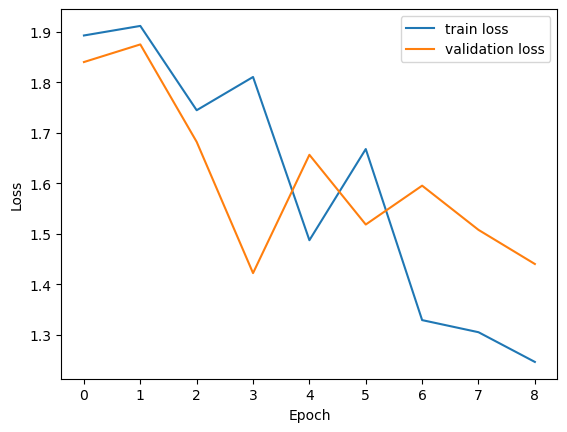

In [7]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


### Step 7: Make Predictions

Define a function to make predictions on new images using the trained model.

In [8]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(predictions)]
    
    return predicted_class

In [9]:
# Test with a new image
img_path = 'TEST1.jpg'  
predicted_class = predict_image(model, img_path)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
The predicted class is: human
